## COM-480: Data Visualization

## [Insert witty title]

**Team**: Alexander Sternfeld, Silvia Romanato & Antoine Bonnet

**Dataset**: [Global Terrorism Database (GTD)](https://www.start.umd.edu/gtd/) 

**Additional dataset**: https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl%3A1902.1/17702

Several projects have already explored this dataset. You can see them listed on [Kaggle](https://www.kaggle.com/datasets/START-UMD/gtd).  

### Exploratory Data Analysis

To run our code, please [download the dataset](https://www.start.umd.edu/gtd/contact/download) by filling out the form. After a few minutes, you will receive two data files `GTD1.xlsx` and `GTD2.xslx`. Place both files in the `/data` folder. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_columns', None)


In [2]:
# If the data is already combined, read it
if os.path.exists('data/GTD.pkl'):
    df = pd.read_pickle('data/GTD.pkl')
    
# Otherwise read both files and combine them
elif os.path.exists('data/GTD1.xlsx') and os.path.exists('data/GTD2.xlsx'):
    # Read data, ignore unicode errors
    df_1 = pd.read_excel('data/GTD1.xlsx')
    df_2 = pd.read_excel('data/GTD2.xlsx')
    # Append the two dataframes and save in a serialized format
    df = df_1.append(df_2)
    df.to_pickle('data/GTD.pkl')
else:
    print('Data not found, please put data in data folder')

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970.0,7.0,2.0,NaN,0.0,NaT,58.0,Dominican Republic,2.0,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970.0,0.0,0.0,NaN,0.0,NaT,130.0,Mexico,1.0,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970.0,1.0,0.0,NaN,0.0,NaT,160.0,Philippines,5.0,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970.0,1.0,0.0,NaN,0.0,NaT,78.0,Greece,8.0,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN

### Research questions 

### Final question
- How has organized terrorism evolved over time?

### Subquestions
- How have the motives of terrorist groups evolved over time?
- Has there been an increase in terrorism executed by groups compared to individual attacks?
- Do terrorist groups with different motives use different strategies?


## Exploratory analysis Q1 Alex

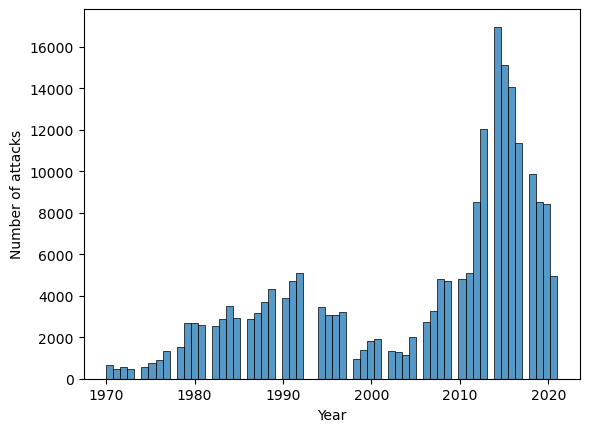

In [15]:
# Plot distribution of column 'iyear'
sns.histplot(df['iyear'])
plt.xlabel('Year')
# give title
plt.ylabel('Number of attacks')
plt.show()


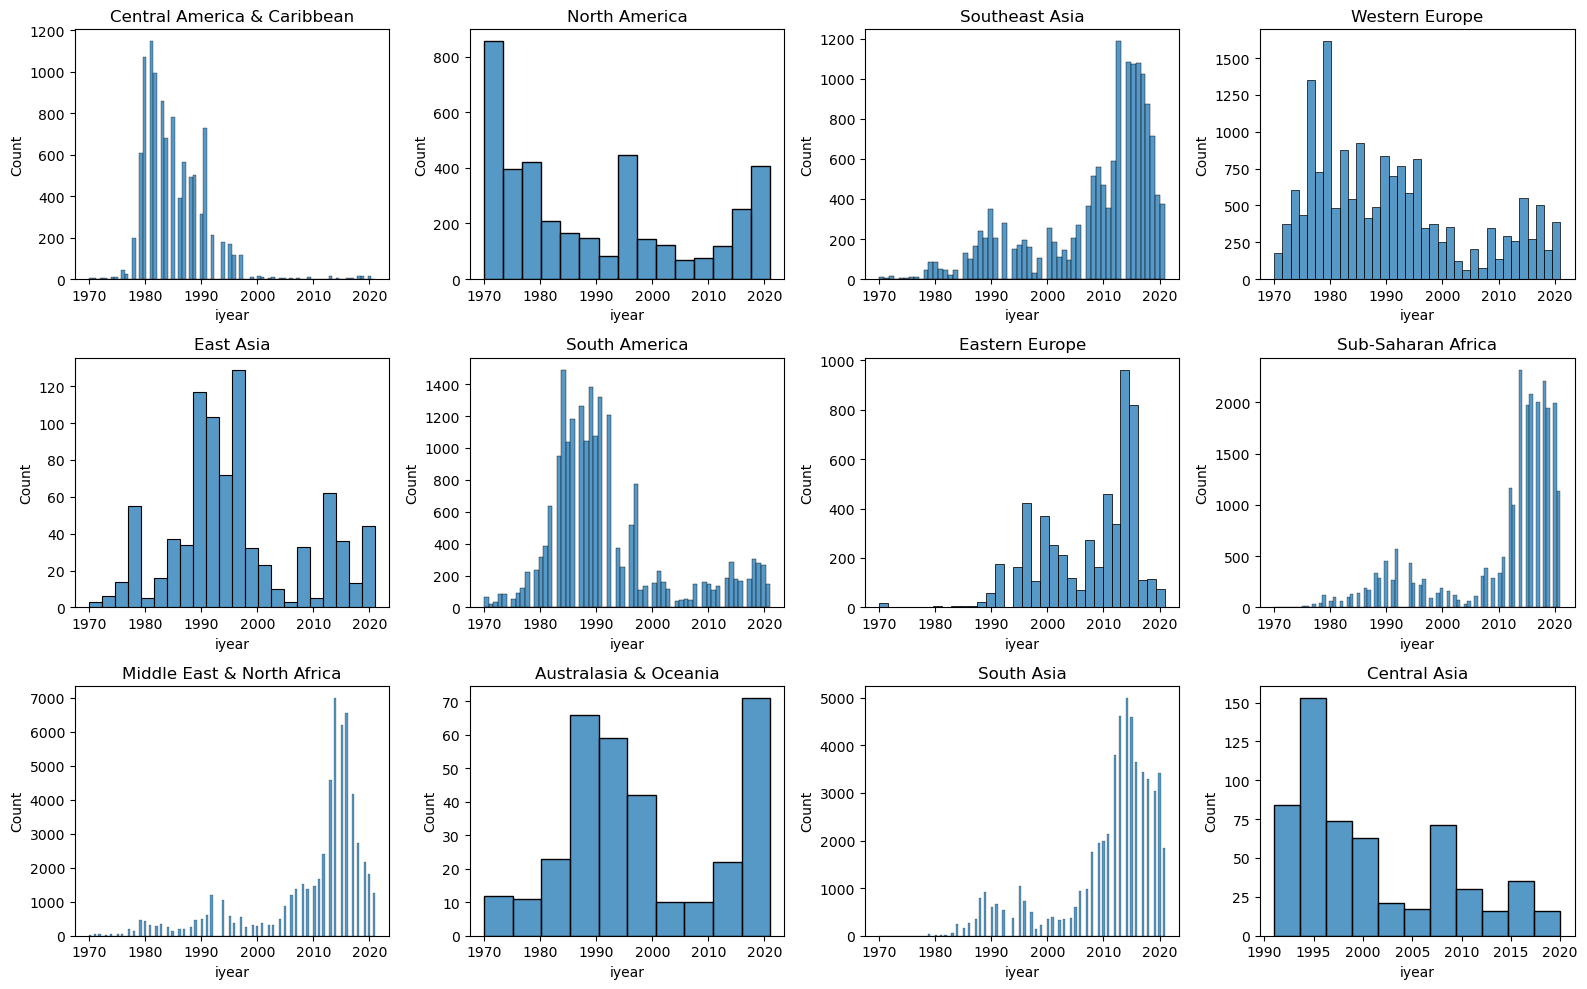

In [5]:
# For each region, plot the number of attacks per year
# create subplots
fig, ax = plt.subplots(3, 4, figsize=(16, 10))
# create a list of regions
regions = df['region_txt'].unique()
# create a list of axes
axes = ax.flatten()
# iterate over regions and axes
for region, ax in zip(regions, axes):
    # filter the data
    df_region = df[df['region_txt'] == region]
    # plot the data
    sns.histplot(df_region['iyear'], ax=ax)
    # set title
    ax.set_title(region)
fig.tight_layout()
plt.show()



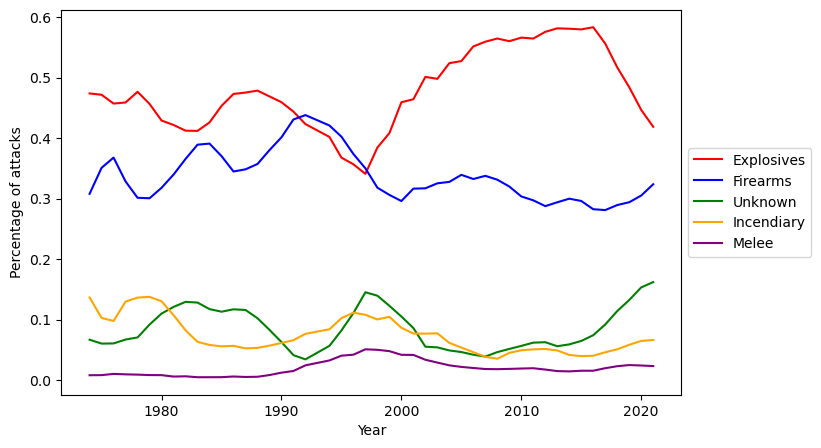

In [49]:
# For the top 5 overall weapons used, plot the number of attacks per year
# in one plot, with a different line for each weapon. The plot should contain lines, not bars.
# create a list of weapons
weapons = df['weaptype1_txt'].value_counts().head(5).index
# create a list of colors
colors = ['red', 'blue', 'green', 'orange', 'purple']
# create a figure
fig, ax = plt.subplots(figsize=(8, 5))
# iterate over weapons and colors
for weapon, color in zip(weapons, colors):
    # filter the data
    df_weapon = df[df['weaptype1_txt'] == weapon]
    # plot percentage of attacks per year that used this weapon, use a rolling average of 5 years
    plt.plot((df_weapon['iyear'].value_counts().sort_index() / df['iyear'].value_counts().sort_index()).rolling(5).mean(), color=color)
ax.legend(weapons, loc='center left', bbox_to_anchor=(1, 0.5))
# add axis
plt.xlabel('Year')
plt.ylabel('Percentage of attacks')

plt.show()


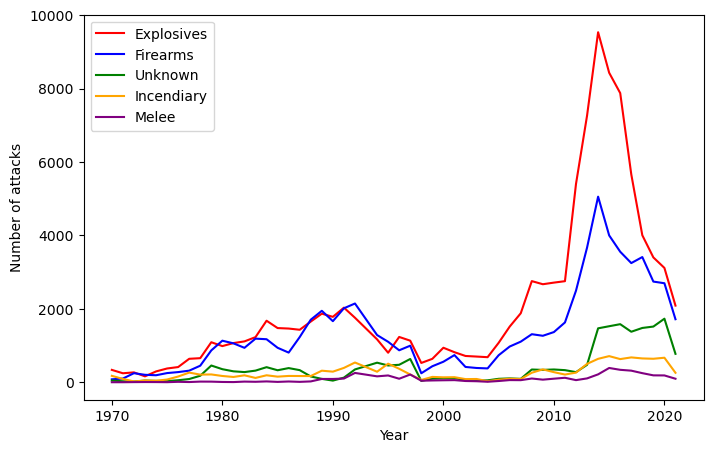

In [34]:
# For the top 5 overall weapons used, plot the number of attacks per year
# in one plot, with a different line for each weapon. The plot should contain lines, not bars.
# create a list of weapons
weapons = df['weaptype1_txt'].value_counts().head(5).index
# create a list of colors
colors = ['red', 'blue', 'green', 'orange', 'purple']
# create a figure
fig, ax = plt.subplots(figsize=(8, 5))
# iterate over weapons and colors
for weapon, color in zip(weapons, colors):
    # filter the data
    df_weapon = df[df['weaptype1_txt'] == weapon]
    # plot the data, do not use sns lineplot
    df_weapon.groupby('iyear')['iyear'].count().plot(ax=ax, color=color)
# add legend
ax.legend(weapons)
# add axis
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.show()



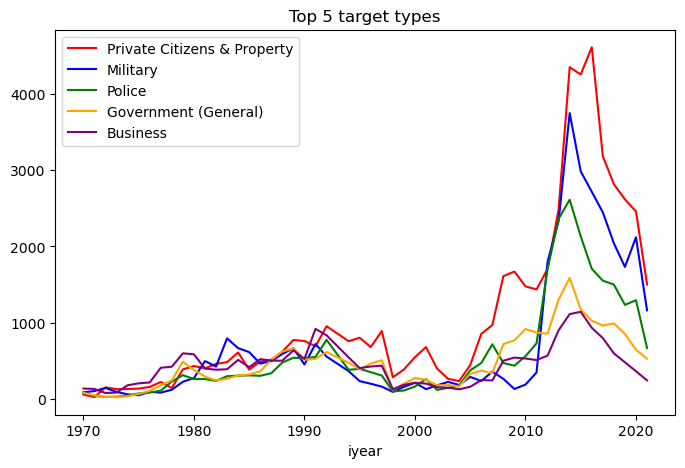

In [7]:
# Do the same for the top 5 target types
# create a list of target types
targets = df['targtype1_txt'].value_counts().head(5).index
# create a list of colors
colors = ['red', 'blue', 'green', 'orange', 'purple']
# create a figure
fig, ax = plt.subplots(figsize=(8, 5))
# iterate over target types and colors
for target, color in zip(targets, colors):
    # filter the data
    df_target = df[df['targtype1_txt'] == target]
    # plot the data, do not use sns lineplot
    df_target.groupby('iyear')['iyear'].count().plot(ax=ax, color=color)
# set title
ax.set_title('Top 5 target types')
# add legend
ax.legend(targets)
plt.show()

## General exploratory analysis

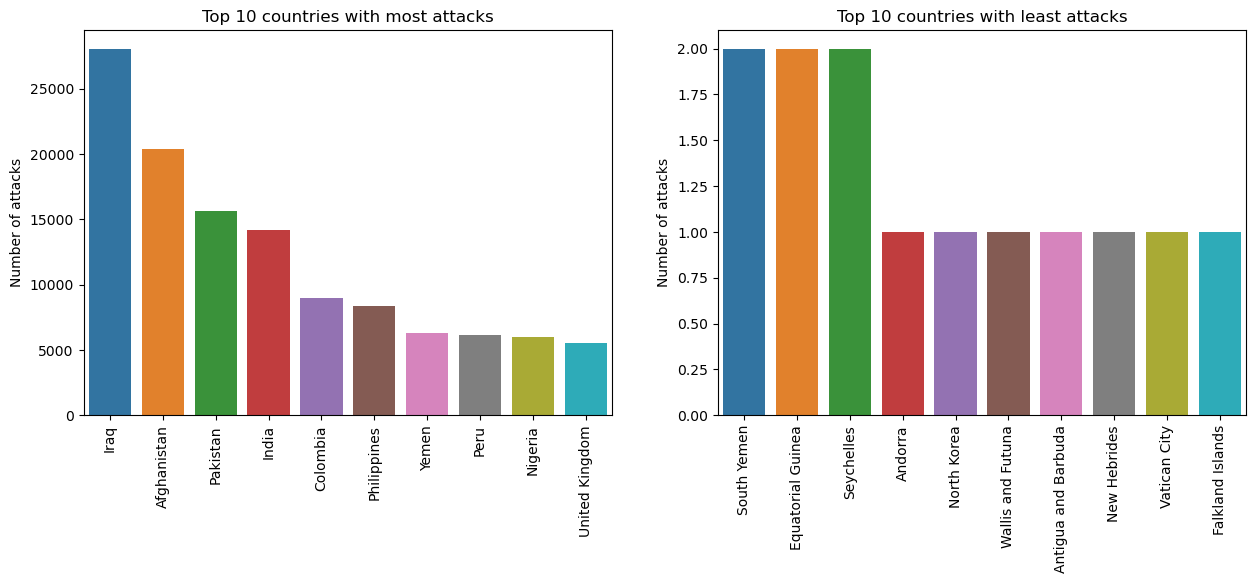

In [19]:
# Plot the top 20 countries with the most attacks, use column 'country_txt', and sort by the number of attacks, tilt x-axis labels by 90 degrees. THe number of attacks is the number of rows for each country
# At the right hand side, do the same plot but with the 20 countries with the least attacks. The number of attacks is the number of rows for each country
# make subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# remove attack with international as country
df = df[df['country_txt'] != 'International']
# plot top 20 countries with most attacks
sns.barplot(x=df['country_txt'].value_counts().head(10).index, y=df['country_txt'].value_counts().head(10).values, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Top 10 countries with most attacks')
# y axis label
ax1.set_ylabel('Number of attacks')
# plot top 20 countries with least attacks
sns.barplot(x=df['country_txt'].value_counts().tail(10).index, y=df['country_txt'].value_counts().tail(10).values, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title('Top 10 countries with least attacks')
# y axis label
ax2.set_ylabel('Number of attacks')
plt.show()


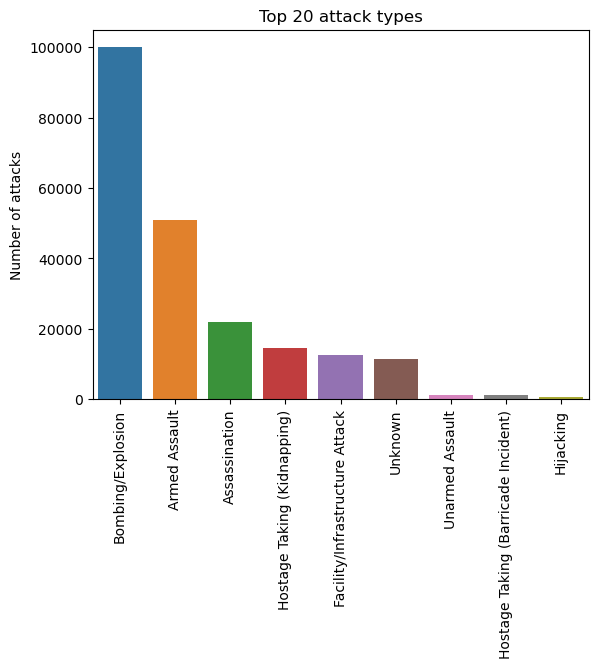

In [9]:
# Do the same plot as above, but now for the column 'attacktype1_txt', which contains the type of attack. The number of attacks is the number of rows for each attack type
sns.barplot(x=df['attacktype1_txt'].value_counts().head(20).index, y=df['attacktype1_txt'].value_counts().head(20).values)
# title and y axis label
plt.title('Top 20 attack types')
plt.ylabel('Number of attacks')
# tilt x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()


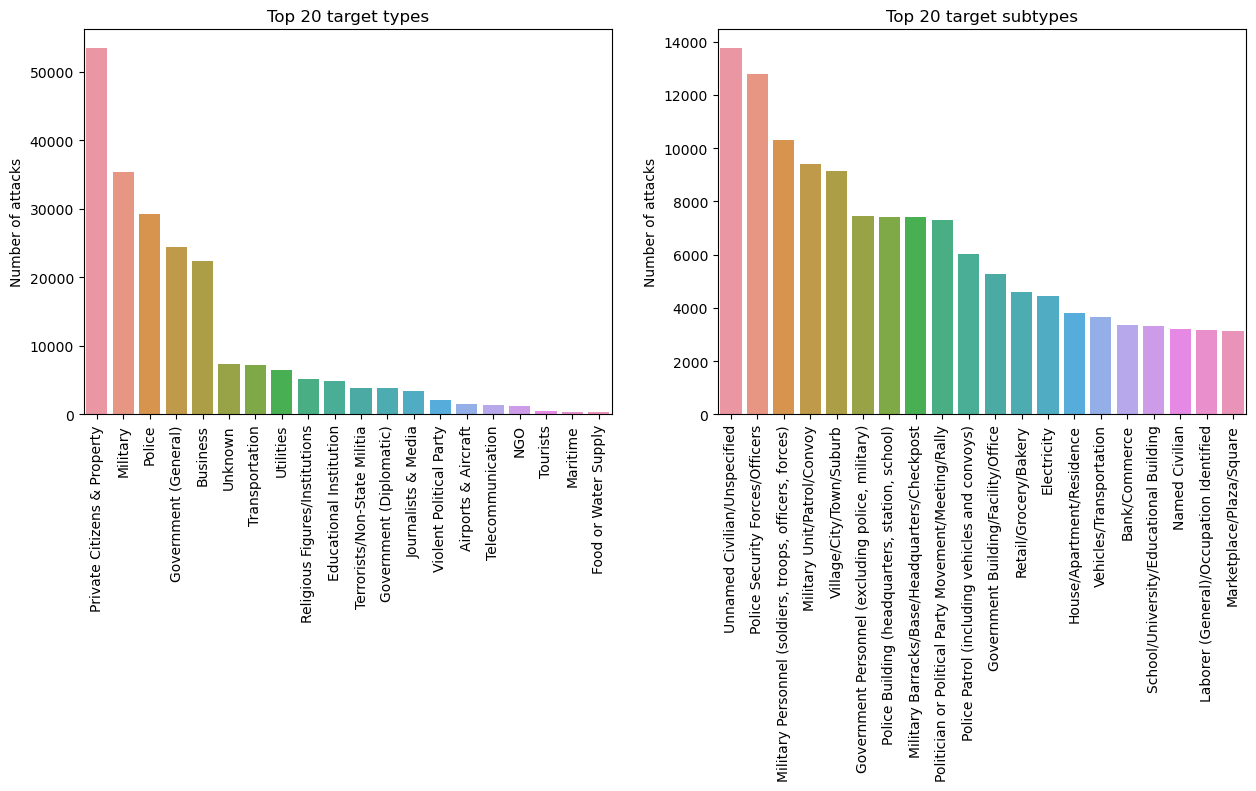

In [10]:
df.head()
# Do the same, but now for the column 'targtype1_txt', which contains the type of target. The number of attacks is the number of rows for each target type
# On the right hand side, do it for the column 'targsubtype1_txt', which contains the subtype of target. The number of attacks is the number of rows for each target subtype
# make subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# plot top 20 target types
sns.barplot(x=df['targtype1_txt'].value_counts().head(20).index, y=df['targtype1_txt'].value_counts().head(20).values, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Top 20 target types')
# y axis label
ax1.set_ylabel('Number of attacks')
# plot top 20 target subtypes
sns.barplot(x=df['targsubtype1_txt'].value_counts().head(20).index, y=df['targsubtype1_txt'].value_counts().head(20).values, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title('Top 20 target subtypes')
# y axis label
ax2.set_ylabel('Number of attacks')
plt.show()



In [11]:
# Count number of rows where motive is not null
df['motive'].notnull().sum()

# percentage of rows where motive is not null
df['motive'].notnull().sum() / df.shape[0]

# For each column, print percentage of rows where the column is not null. Put in a dataframe and sort by percentage
# create a list of columns
columns = df.columns
# create a list of percentages
percentages = []
# iterate over columns
for column in columns:
    # calculate percentage
    percentage = df[column].notnull().sum() / df.shape[0]
    # append to list
    percentages.append(percentage)
# create a dataframe
df_percentages = pd.DataFrame({'column': columns, 'percentage': percentages})
# sort by percentage
df_percentages.sort_values('percentage', ascending=False, inplace=True)
# print dataframe
df_percentages.tail(50)

,column,percentage
45,targsubtype2_txt,0.068017
122,hostkidoutcome,0.067933
123,hostkidoutcome_txt,0.067933
46,corp2,0.065711
124,nreleased,0.065083
4,approxdate,0.060899
113,ndays,0.049719
30,attacktype2,0.041609
31,attacktype2_txt,0.041609
59,gsubname,0.034808


# Groups Exploration

In [7]:
# the number of groups in the dataset
print("The number of groups is:", df['gname'].nunique())
# the number of groups with more than 1000 attacks
print("The number of groups with more than 1000 attacks:", df['gname'].value_counts()[df['gname'].value_counts() > 1000].count())

The number of groups is: 3767
The number of groups with more than 1000 attacks: 21


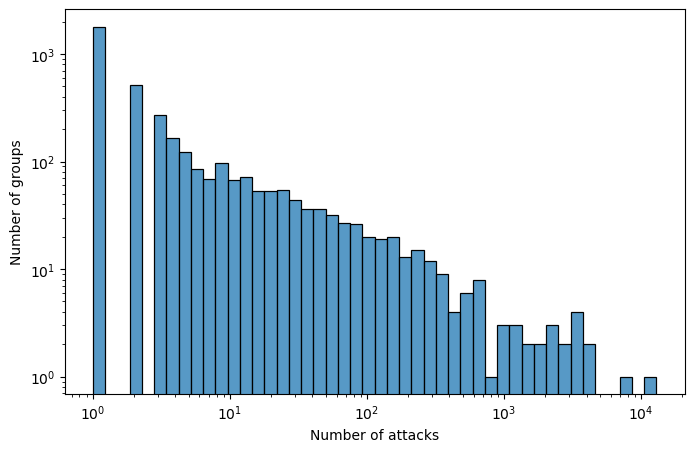

In [18]:
# plot the distribution of attacks per group
fig, ax = plt.subplots(figsize=(8, 5))
# plot the log-log of the number of attacks per group
sns.histplot(df['gname'].value_counts(), log_scale=(True, True), ax=ax)
ax.set_xlabel('Number of attacks')
ax.set_ylabel('Number of groups')
plt.show()

In [14]:
# to rename some columns
#df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
#                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
#                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
#                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

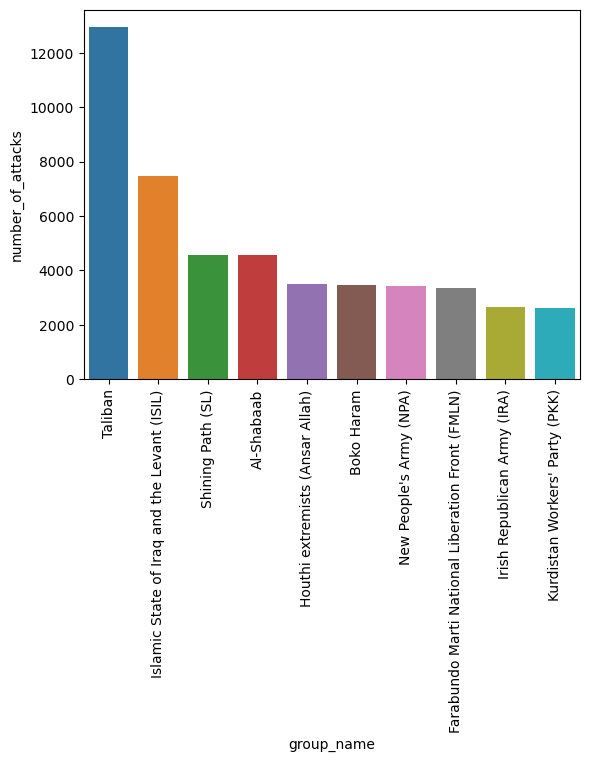

In [9]:
# Plot the 10 largest groups in terms of number of attacks
# In one barplot

# create a dataframe with the number of attacks per group
df_group = df['gname'].value_counts().to_frame()
# rename the column
df_group.rename(columns={'gname': 'number_of_attacks'}, inplace=True)
# reset the index
df_group.reset_index(inplace=True)
# rename the columns
df_group.rename(columns={'index': 'group_name'}, inplace=True)
# plot the top 10 groups
sns.barplot(x='group_name', y='number_of_attacks', data=df_group.head(10))
# tilt x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()



In [14]:
# For each country, calculate the percentage of attacks with a gname that is not 'Unknown' or NaN. Show the top 10 countries with the highest percentage

# create a dataframe with the number of attacks per country
df_country = df['country_txt'].value_counts().to_frame()
# rename the column
df_country.rename(columns={'country_txt': 'number_of_attacks'}, inplace=True)
# reset the index
df_country.reset_index(inplace=True)
# rename the columns
df_country.rename(columns={'index': 'country'}, inplace=True)
# create a list of countries
countries = df_country['country'].tolist()
# create a list of percentages
percentages = []
# iterate over countries
for country in countries:
    # calculate percentage
    percentage = df[(df['country_txt'] == country) & (df['gname'] != 'Unknown')]['gname'].count() / df[df['country_txt'] == country]['gname'].count()
    # append to list
    percentages.append(percentage)
# add the percentages to the dataframe
df_country['percentage'] = percentages
# sort by percentage
df_country.sort_values('percentage', ascending=False, inplace=True)
# print the top 10 countries
df_country.head(10)





C:\Users\alexs\AppData\Local\Temp\ipykernel_17092\3659400178.py:18: RuntimeWarning: invalid value encountered in longlong_scalars
  percentage = df[(df['country_txt'] == country) & (df['gname'] != 'Unknown')]['gname'].count() / df[df['country_txt'] == country]['gname'].count()


,country,number_of_attacks,percentage
0,Iraq,28068,1.0
97,Albania,83,1.0
123,Jamaica,36,1.0
124,Ghana,35,1.0
125,Guyana,33,1.0
126,Macau,33,1.0
127,New Zealand,33,1.0
128,Czech Republic,32,1.0
129,Kazakhstan,31,1.0
130,Maldives,30,1.0


In [16]:
top_20_groups = df.groupby('gname').count()['eventid'].sort_values()[-20:].index
top_20_groups

Index(['Al-Qaida in the Arabian Peninsula (AQAP)', 'Palestinians',
       'Fulani extremists', 'Tehrik-i-Taliban Pakistan (TTP)',
       'Liberation Tigers of Tamil Eelam (LTTE)',
       'National Liberation Army of Colombia (ELN)',
       'Basque Fatherland and Freedom (ETA)',
       'Communist Party of India - Maoist (CPI-Maoist)', 'Maoists',
       'Revolutionary Armed Forces of Colombia (FARC)',
       'Kurdistan Workers' Party (PKK)', 'Irish Republican Army (IRA)',
       'Farabundo Marti National Liberation Front (FMLN)',
       'New People's Army (NPA)', 'Boko Haram',
       'Houthi extremists (Ansar Allah)', 'Al-Shabaab', 'Shining Path (SL)',
       'Islamic State of Iraq and the Levant (ISIL)', 'Taliban'],
      dtype='object', name='gname')

In [17]:
# add a boolean column if the motive has the word 'unknown' in it
df['motive_unknown'] = df['motive'].str.contains('unknown', case=False)
# remove the 'the specific motive is unknown' from the motive
df['motive'] = df['motive'].str.replace('The specific motive is unknown', '')
df['motive'] = df['motive'].str.replace('The specific motive for the attack is unknown', '')

# print the values when the motive has unknown in it
df[df['motive'].str.contains('unknown', na=False)]['motive'].unique()

array(['The motive for this specific attack is unknown.  However, there were a series of similar attacks perpetrated by left wings groups around this time.',
       "Motive is unknown; however, the campus had been involved in ongoing disputes between university administration and student advocates for Puerto Rico's independence from the U.S.",
       'The exact motive is unknown; however this occurred during a meeting held to discuss Latino-American relations, especially between the police and the Mexican-American residents in the community',
       ...,
       "An unknown assailant claimed responsibility for the incident through a note demanding the targeted mosque's closure.",
       'An unknown group claimed responsibility for the incident and demanded that security forces leave Shetile Island.',
       'An unknown group claimed responsibility for the incident in a note left at the scene, stating "out latifundistas. Death Apra (Association of Peace and Reconciliation Araucania)".'],

In [18]:
# the percentage of null motive with 2 decimal places
print("The percentage of null motive is:", round(df['motive'].isnull().sum() / len(df) * 100, 2), "%")

The percentage of null motive is: 74.01 %


In [19]:
# replace unknown with nan
df.loc[df.motive == 'Unknown', 'motive'] = np.nan
df.loc[df.motive == 'unknown', 'motive'] = np.nan

# print  the unique values  for the motive column
df['motive'].unique()

array([nan, 'To protest the Cairo Illinois Police Deparment',
       'To protest the War in Vietnam and the draft', ...,
       '; however, sources noted that the victim was suspected of being a military informant.',
       '; however, sources suspected that the attack was carried out to block the supply of food and resources to civilians in Sharan.',
       "; however, sources noted a pattern of violence against churches in Canada following the discovery of hundreds of unmarked children's graves at former indigenous residential schools."],
      dtype=object)

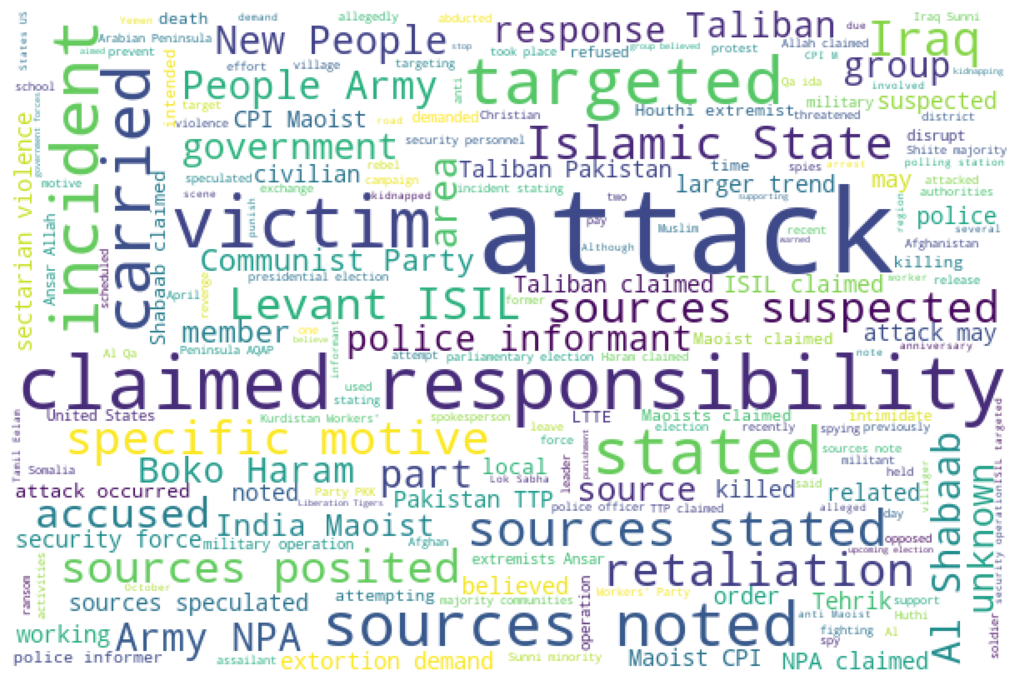

In [20]:
from wordcloud import WordCloud

# get the  motivation for the top 20 groups
motivation = df[df['gname'].isin(top_20_groups)]['motive'].dropna() 
# plot the wordcloud
wordcloud = WordCloud(background_color='white', width=600, height=400).generate(' '.join(motivation))
plt.figure(figsize=(10, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

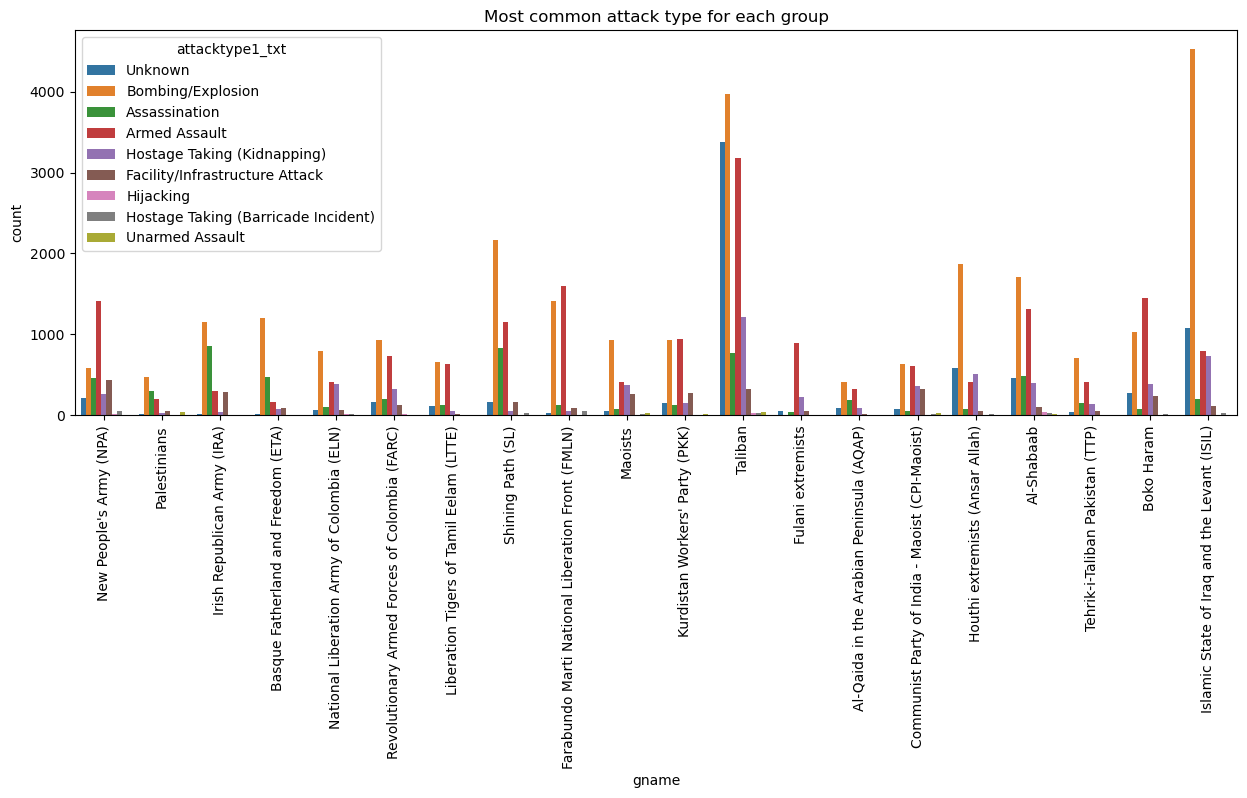

In [21]:
# plot the most commot attack type for each group
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.countplot(x='gname', hue='attacktype1_txt', data=df[df['gname'].isin(top_20_groups)], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Most common attack type for each group')
plt.show()

In [22]:
# print the two most common traget types for each group
for group in top_20_groups:
    print(group, ':', '\n', df[df['gname'] == group]['targtype1_txt'].value_counts().head(2), '\n')

Al-Qaida in the Arabian Peninsula (AQAP) : 
 Military                490
Government (General)    154
Name: targtype1_txt, dtype: int64 

Palestinians : 
 Private Citizens & Property    443
Military                       305
Name: targtype1_txt, dtype: int64 

Fulani extremists : 
 Private Citizens & Property    1063
Government (General)             55
Name: targtype1_txt, dtype: int64 

Tehrik-i-Taliban Pakistan (TTP) : 
 Military                       328
Private Citizens & Property    323
Name: targtype1_txt, dtype: int64 

Liberation Tigers of Tamil Eelam (LTTE) : 
 Military                       548
Private Citizens & Property    316
Name: targtype1_txt, dtype: int64 

National Liberation Army of Colombia (ELN) : 
 Utilities    344
Military     274
Name: targtype1_txt, dtype: int64 

Basque Fatherland and Freedom (ETA) : 
 Business    645
Police      546
Name: targtype1_txt, dtype: int64 

Communist Party of India - Maoist (CPI-Maoist) : 
 Private Citizens & Property    612
Police 

In [23]:
# print the two most common traget types for each group
for group in top_20_groups:
    print(group, ':', '\n', df[df['gname'] == group]['country_txt'].value_counts().head(2), '\n')

Al-Qaida in the Arabian Peninsula (AQAP) : 
 Yemen           1106
Saudi Arabia      10
Name: country_txt, dtype: int64 

Palestinians : 
 West Bank and Gaza Strip    562
Israel                      396
Name: country_txt, dtype: int64 

Fulani extremists : 
 Nigeria    1256
Mali         10
Name: country_txt, dtype: int64 

Tehrik-i-Taliban Pakistan (TTP) : 
 Pakistan       1489
Afghanistan      19
Name: country_txt, dtype: int64 

Liberation Tigers of Tamil Eelam (LTTE) : 
 Sri Lanka    1592
India           8
Name: country_txt, dtype: int64 

National Liberation Army of Colombia (ELN) : 
 Colombia     1801
Venezuela      39
Name: country_txt, dtype: int64 

Basque Fatherland and Freedom (ETA) : 
 Spain     1975
France      28
Name: country_txt, dtype: int64 

Communist Party of India - Maoist (CPI-Maoist) : 
 India    2112
Nepal       1
Name: country_txt, dtype: int64 

Maoists : 
 India    1930
Nepal     229
Name: country_txt, dtype: int64 

Revolutionary Armed Forces of Colombia (FARC